In [19]:
# -*- coding: utf-8 -*-
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
data = pd.read_csv('AmazonReview.csv', encoding_errors='ignore')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [35]:
### Preprocessing and cleaning the reviews 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [38]:
#To drop the null values (if any), run the below command
data.dropna(inplace=True)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [40]:
# Clasificar Sentimientos.
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1


In [43]:
# Eliminar palabra que no tienen sentido ejemplo: a, the, is
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
data['Review']=data['Review'].apply(clean_review)

In [44]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [45]:
#Analysis of the Dataset

#Let’s check out that how many counts are there for positive and negative sentiments.

In [47]:
data['Sentiment'].value_counts()


0    15000
1     9999
Name: Sentiment, dtype: int64

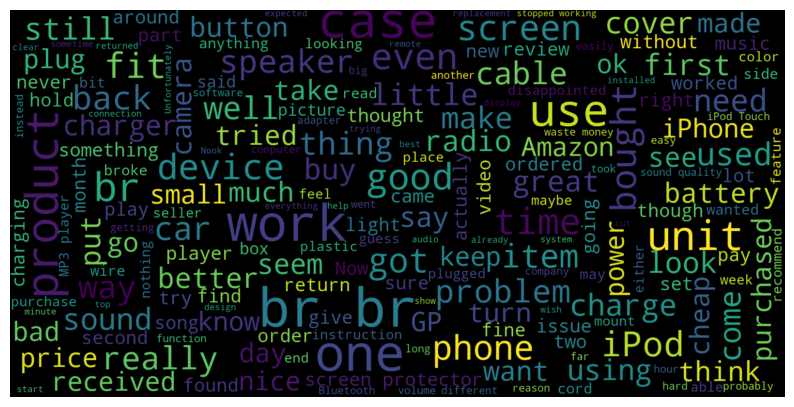

In [53]:
#Para tener una mejor idea de la importancia de las palabras, creemos la nube de 
#palabras de todas las palabras con sentimiento = 0, es decir, negativo.

consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

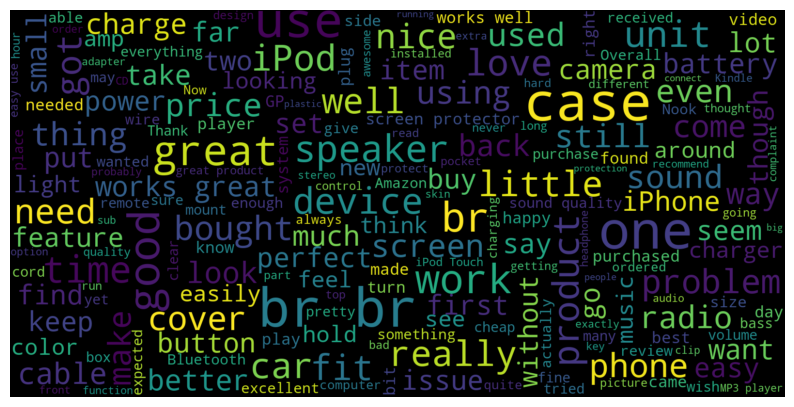

In [52]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(10,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Ahora tenemos una imagen clara de las palabras que tenemos en ambas categorías.

#Vamos a crear los vectores.

#TF-IDF calcula qué tan relevante es una palabra en una serie o corpus para un texto.
#El significado aumenta proporcionalmente al número de veces que aparece una palabra en el texto, 
#pero se compensa con la frecuencia de palabras en el corpus (conjunto de datos). 

In [54]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [55]:
### Model training, Evaluation, and Prediction
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],test_size=0.25,random_state=42)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))


0.816


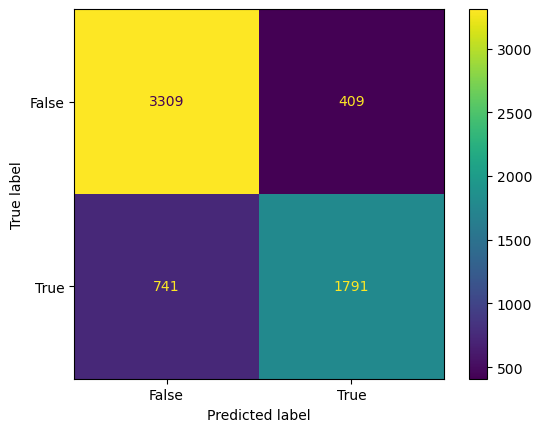

In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()